Jon Chun
24 Oct 2021

# New Section

# **Requirements**

* Must use **Chrome** browser (esp not Safari)
* Use only **plain text** files (no *.rtf, *.doc, etc)

# **Setup and Configuration**

In [1]:
# VERIFY that you have a GPU-backed Linux VM instance

!nvidia-smi

Sat Dec 10 10:22:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 12.9 MB/s 
     |████████████████████████████████| 182 kB 43.5 MB/s 
     |████████████████████████████████| 7.6 MB 58.5 MB/s 


In [3]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 175 kB 27.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=fe6ad409f92709fabc64b3f81bb29958b365d7ca046ee681e878490ca2c7f42f
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [4]:
!pip install unidecode  # clean-text dependency

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 14.9 MB/s 


In [5]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 14.5 MB/s 
     |████████████████████████████████| 287 kB 68.0 MB/s 


In [6]:
!pip install python-slugify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from slugify import slugify

In [8]:
# Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re

from cleantext import clean
import contractions
from slugify import slugify

from scipy.signal import find_peaks

from google.colab import files



In [60]:
# Setup matplotlib

# %matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Globals

In [10]:
# Global Vars

novel_filename_str = ''
novel_title_str = ''
novel_raw_str = ''
novel_clean_str = ''

novel_lines_ls = []
novel_sentences_ls = []
novel_paragraphs_ls = []

# Main (Modin) DataFrame for Novel Sentiments
sentiment_df = pd.DataFrame

TEXT_ENCODING = 'utf-8'

In [11]:
def verify_novel(anovel_raw_str, anovel_title_str, index_ends=500):
  '''
  INPUT: string in some stage of processing
  OUTPUT: display summary index_ends chars of header/footer for verification
  '''

  print(f'Novel Title: {anovel_title_str}')
  print(f'  Char Len: {len(anovel_raw_str)}')
  print('====================================\n')
  print(f'Beginning:\n\n {anovel_raw_str[:index_ends]}\n\n')
  print('\n------------------------------------')
  print(f'Ending:\n\n {anovel_raw_str[-index_ends:]}\n\n')

In [12]:
def save_text2txt_and_download(text_obj, file_suffix='_save.txt'):
  '''
  INPUT: text object and suffix to add to output text filename
  OUTPUT: Write text object to text file (both temp VM and download)
  '''

  if type(text_obj) == str:
    print('STEP 1. Processing String Object\n')
    str_obj = text_obj
  elif type(text_obj) == list:
    if (len(text_obj) > 0):
      if type(text_obj[0]) == str:
        print('STEP 1. Processing List of Strings Object\n')
        str_obj = "\n".join(text_obj)
      else:
        print('ERROR: Object is not an List of Strings [save_text2txt_and_download()]')
        return -1
    else:
      print('ERROR: Object is an empty List [save_text2txt_and_download()]')
      return -1
  else:
    print('ERROR: Object Type is neither String nor List [save_text2txt_and_download()]')
    return -1

  datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  # out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
  out_filename = novel_name_str.split('.')[0] + file_suffix

  # Write file to temporary VM filesystem
  print(f'STEP 2. Saving textfile to temporary VM file: {out_filename}\n')
  with open(out_filename, "w") as fp:
    fp.write(str_obj)

  # Download permanent copy of file
  print(f'STEP 3. Downloading permanent copy of textfile: {out_filename}\n')
  files.download(out_filename)

In [13]:
def save_df2csv_and_download(df_obj, file_suffix='_save.csv', nodate=True):
  '''
  INPUT: DataFrame object and suffix to add to output csv filename
  OUTPUT: Write DataFrame object to csv file (both temp VM and download)
  '''

  if isinstance(df_obj, pd.DataFrame):
    datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    if nodate:
      out_filename = novel_name_str.split('.')[0] + file_suffix
    else:
      out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
    # print(f'STEP 1. Saving DataFrame: {df_obj.__name__} to temporary VM file: {out_filename}\n') # Also, isinstance(obj, pd.DataFrame)
    print(f'STEP 1. Saving DataFrame to temporary VM file: {out_filename}\n')
    df_obj.to_csv(out_filename, index=False) 
  else:
    print(f'ERROR: Object is not a DataFrame [save_df2csv_and_download()]')
    return -1

  # Download permanent copy of file
  print(f'STEP 2. Downloading permanent copy of csvfile: {out_filename}\n')
  files.download(out_filename)


# Test

# save_df2csv_and_download(temp_df, '_bert-nlptown.txt')

In [14]:
def expand_contractions(input_str):
  '''
  INPUT: long string
  OUTPUT: long string with expanded contractions
  '''

  output_str = contractions.fix(input_str)

  return output_str

"""
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]
"""

'\n# novel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_ls]\nnovel_clean_ls = [contractions.fix(x) for x in novel_ls]\nnovel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_clean_ls]\nnovel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]\n# novel_clean_ls = [re.sub(r"^["\']", "", x) for x in novel_clean_ls]  # re.sub("["\']", "", s)\n# novel_clean_ls = [re.sub(r"["\']$", "", x) for x in novel_clean_ls]\nnovel_clean_ls = [x.encode(\'ascii\',errors=\'ignore\').decode() for x in novel_clean_ls]\n# novel_bin = novel_clean_str.encode(\'ascii\',errors=\'ignore\')\n# novel_clean_str = novel_bin.decode()\n\n[f\'[{x}]\' for x in novel_clean_ls]\n'

# **Get the Novel Text**

## OPTION (a): Upload Raw Textfile

In [15]:
%%time

# NOTE: 1m07s

# Upload Plain Text File
uploaded = files.upload()

# NOTE: Allows for multiple file uploads, will only process the last
#       Left in for future feature addition (processing multiple files at once)
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  novel_filename_str = fn

# Extract from Dict and decode binary into char string
novel_raw_str = uploaded[novel_filename_str].decode(TEXT_ENCODING)

Saving great-expectations_charles-dickens.txt to great-expectations_charles-dickens.txt
User uploaded file "great-expectations_charles-dickens.txt" with length 1002237 bytes
CPU times: user 506 ms, sys: 61.4 ms, total: 567 ms
Wall time: 1min 14s


In [16]:
#@title Enter Novel_Title in the form [Title] by [Author]

Novel_Title = "Great Expectations by Charles Dickins" #@param {type:"string"}

# Remove illegal filename punctuation
Novel_Title = Novel_Title.replace("'","")
Novel_Title = Novel_Title.replace('"','')
Novel_Title = Novel_Title.replace('.',' ')

novel_title_str = ' '.join([x.capitalize() for x in slugify(Novel_Title).replace('-',' ').split()])
novel_title_str

'Great Expectations By Charles Dickins'

In [17]:
# CHECK: That you've trimmed the header/footer before uploading

print(f'Novel Filename:\n\n  {novel_filename_str}\n\n')

verify_novel(novel_raw_str, novel_title_str)

Novel Filename:

  great-expectations_charles-dickens.txt


Novel Title: Great Expectations By Charles Dickins
  Char Len: 1000164

Beginning:

 Chapter 1
My father's family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip. So, I called myself Pip, and came to be called Pip.

I give Pirrip as my father's family name, on the authority of his tombstone and my sister—Mrs. Joe Gargery, who married the blacksmith. As I never saw my father or my mother, and never saw any likeness of either of them (for their days were long before the days of photographs), my 



------------------------------------
Ending:

 e as considerate and good to me as you were, and tell me we are friends."

"We are friends," said I, rising and bending over her, as she rose from the bench.

"And will continue friends apart," said Estella.

I took her hand in mine, and we went out of the ruined place; and, as the morning mists had risen 

## OPTION (b): Read from gDrive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

MessageError: ignored

In [ ]:
# drive.mount("/gdrive", force_remount=True)

In [ ]:
# CUSTOMIZE: set GDrive path below

%cd ./MyDrive/courses/2021f_iphs200_programming_humanity/code/

In [ ]:
!ls *.txt

In [ ]:
# CUSOTMIZE: set 'novel_filename' to the filename of your novel

# novel_filename = 'jkrowling_1sorcerersstone.txt'
novel_filename_str ='Percy_Jackson_The_Lightning_Thief.txt'

In [ ]:
#@title Enter Novel_Title in the form [Title] by [Author]

Novel_Title = "The Lightening Thief by Percy Jackson" #@param {type:"string"}
novel_title_str = Novel_Title

In [ ]:
# Read file into string

with open(novel_filename_str, "r") as fp:
  novel_raw_str = fp.read() #reading all the content in one step

In [ ]:
# Verify

# CHECK: That you've trimmed the header/footer before uploading

print(f'Novel Filename:\n\n  {novel_filename_str}\n\n')

verify_novel(novel_raw_str, novel_title_str)

In [ ]:
# END

In [ ]:
# Read novel into list of Paragraphs

delimiter = "\n\n"

with open(novel_filename, "r") as fp:
  novel_raw_str = fp.read() #reading all the content in one step
  #using the string methods we split it
  novel_parags_ls = novel_raw_str.split(delimiter)
  novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]

print(f'Paragraph Count: {len(novel_parags_ls)}')

In [ ]:
# Read novel into list of Lines

# may need delimiter

with open(novel_filename, 'r') as fp:
  novel_lines_ls = fp.readlines()

print(f'Line Count: {len(novel_lines_ls)}')

In [ ]:
novel_parags_ls[:10]

In [ ]:
novel_ls[100:110]

In [ ]:
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]

In [ ]:
novel_clean_str = '\n'.join(novel_clean_ls)
print(novel_clean_str[:5000])

In [ ]:
# novel_clean_ls[1] = "THE SILVER SPOON I was born twice: first, as a baby girl, on a remarkably smogless Detroit day in January of 1960; and then again, as a teenage boy, in an emergency room near Petoskey, Michigan, in August of 1974. Specialized readers may have come across me in Dr. Peter Luce’s study, “Gender Identity in 5-Alpha-Reductase Pseudohermaphrodites,” published in theJournal of Pediatric Endocrinology in 1975. Or maybe you’ve seen my photograph in chapter sixteen of the now sadly outdatedGenetics and Heredity."

In [ ]:
# novel_clean_ls.pop(0)

In [ ]:
novel_clean_ls[:10]

In [ ]:
novel_clean_ls[-10:]

In [ ]:
# novel_clean_str = '\n'.join(novel_clean_ls)

# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

# print(novel_clean_str[:5000])

## OPTION (c): Scrape Project Gutenberg

**Goto *https://gutenberg.net.au* and find the *.HTML (not *.TXT) version of your novel**

In [ ]:
from bs4 import BeautifulSoup

import requests

In [ ]:
#@title Enter the URL of your novel at ***gutenberg.net.au***
#@markdown Paste the URL to the ***HTML version*** (not plain text).

Novel_Title = 'Frankenstein by Mary Shelley'  #@param {type: "string"}

Gutenberg_URL = 'https://gutenberg.net.au/ebooks/z00006.html'  #@param {type: "string"}


In [ ]:
# Get raw HTML of novel from Gutenberg.net.au

response=requests.get(Gutenberg_URL)  # TODO: Pass the URL to the .get() method of the requests object
html = response.text

In [ ]:
# View raw HTML that we need to clean up

# TODO: What is the difference between these two outputs?

# Option A: 
html

# Option B:
# print(html)

In [ ]:
# Use HTML <p> to extract text into list of paragraphs

soup = BeautifulSoup(html, "html.parser")


paragraph=soup.find_all("p")  # TODO: get all the <P>Paragraphs</P> 
                                #       see bs4 API ref: https://beautiful-soup-4.readthedocs.io/en/latest/#kinds-of-objects
parag_ls = []
for para in paragraph:
    parag_ls.append(para.text)

print(f'There were {len(parag_ls)} Paragraphs:\n') # TODO how do you get the number of paragraphs in the list parag_ls?

print(f"First 3 Paragraphs: ==============================    \n")
print(f"    {list(print(x) for x in parag_ls[:3])}\n")  # TODO: Give index to retrieve the first 3 paragraphs

print(f"Last 3 Paragraphs: ============================== \n")
print(f"    {list(print(x) for x in parag_ls[-3:])}\n")  # TODO: Give index to retrieve the last 3 paragraphs


In [ ]:
# Concatenate all paragraphs into a single novel string

# For every paragraph, replace all hardcoded \r\n with a single space
parag_flat_ls = [re.sub(r'\r\n', ' ', aparag) for aparag in parag_ls]

# Concatenate all paragraphs into a single string, separated by two \n
novel_raw_str = '\n\n'.join(parag_flat_ls)

print('\nSTART OF NOVEL: -----')
print(novel_raw_str[:1000] + '\n')

print('\nEND OF NOVEL: -----\n')
print(novel_raw_str[-1000:])

**Enter the First and Last several words to use as RegEx for trimming header/footers**

In [ ]:
#@title Enter the first sentence in the body of your novel
sentence_first_str = 'St. Petersburgh, Dec. 11th'  #@param {type: "string"}




In [ ]:
#@title Enter the last sentence in the body of your novel
sentence_last_str = 'waves and lost in darkness and distance.'  #@param {type: "string"}

In [ ]:
# Strip off the header
# novel_clean = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
# ' '.join(novel_clean.partition(sentence_last_str)[:2])[-500:]

In [ ]:
# Strip off the header
novel_raw_str = ' '.join(novel_raw_str.partition(sentence_first_str)[1:])

# Strip off the footer
novel_raw_str = ' '.join(novel_raw_str.partition(sentence_last_str)[:2])

# Verify

print('\nSTART OF CLEAN NOVEL: -----')
print(novel_raw_str[:1000] + '\n')

print('\nEND OF CLEAN NOVEL: -----\n')
print(novel_raw_str[-1000:])

In [ ]:
# END

In [ ]:
# CUSTOMIZE: Set delimiter to one (\n) or two (\n\n) returns

# Read novel into list of Paragraphs

delimiter = "\n\n" # or "\n"

novel_paragraphs_ls = novel_raw_str.split(delimiter)
novel_paragraphs_ls = [x.strip() for x in novel_paragraphs_ls if len(x.strip()) > 2]
novel_paragraphs_ls = [' '.join(x.split()) for x in novel_paragraphs_ls]

print(f'Paragraph Count: {len(novel_paragraphs_ls)}')

In [ ]:
# Verify you have list of paragraphs, not sentences

novel_paragraphs_ls[:15]

In [ ]:
for i,aline in enumerate(novel_paragraphs_ls):
  if (len(aline.strip()) < 5):
    print(f'Line #{i}: {aline}')

In [ ]:
novel_clean_str = '\n'.join(novel_paragraphs_ls)
novel_clean_str[:2000]

# **Split Novel into Sentences**

* https://github.com/zaemyung/sentsplit (CRF: mincut)

* https://github.com/adobe/NLP-Cube and Rank ~15 https://aclanthology.org/K18-2017.pdf

In [18]:
import nltk

nltk.download('punkt')

from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
novel_sentences_ls = sent_tokenize(novel_raw_str)

sent_ct = len(novel_sentences_ls)
sent_show = 10

print('\nFirst Sentences: -----\n')
# for i, asent in enumerate(novel_sentences_ls[:sent_show]):
for i, asent in enumerate(novel_sentences_ls[:sent_show]):
  print(f'Sentences #{i}: {asent}')


print('\nLast Sentences: -----\n')
for i, asent in enumerate(novel_sentences_ls[-sent_show:]):
  print(f'Sentences #{sent_ct - (sent_show - i)}: {asent}')


print(f'\n\nThere are {sent_ct} Sentences in the novel')


First Sentences: -----

Sentences #0: Chapter 1
My father's family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip.
Sentences #1: So, I called myself Pip, and came to be called Pip.
Sentences #2: I give Pirrip as my father's family name, on the authority of his tombstone and my sister—Mrs.
Sentences #3: Joe Gargery, who married the blacksmith.
Sentences #4: As I never saw my father or my mother, and never saw any likeness of either of them (for their days were long before the days of photographs), my first fancies regarding what they were like, were unreasonably derived from their tombstones.
Sentences #5: The shape of the letters on my father's, gave me an odd idea that he was a square, stout, dark man, with curly black hair.
Sentences #6: From the character and turn of the inscription, "Also Georgiana Wife of the Above," I drew a childish conclusion that my mother was freckled and sickly.
Sentences #

In [20]:
# Delete the empty Sentences and those without any alphabetic characters

novel_sentences_ls = [x.strip() for x in novel_sentences_ls if len(x.strip()) > 0]
novel_sentences_ls = [x.strip() for x in novel_sentences_ls if re.search('[a-zA-Z]', x)]
len(novel_sentences_ls)

9851

In [21]:
# View the shortest Setences

sorted(novel_sentences_ls, key=len)[:100]
# type(min(novel_sentences_ls, key=len))
# novel_sentences_ls[:1000]

['J.',
 'O!',
 'O!',
 'O!',
 'O!',
 '"O!',
 'O!"',
 'O!"',
 'O!"',
 'Ah!',
 'No.',
 'Mr.',
 'Ah!',
 'Ah!',
 'No.',
 'No.',
 'Ah!',
 'No.',
 'No!"',
 '"Ah!',
 'She?',
 '"No.',
 '"Ah!',
 '"Oh!',
 'Ay!"',
 '"Ay!',
 'Oh!"',
 '"Oh!',
 '"Ah!',
 '"Oh!',
 '"Oh!',
 'Yes.',
 '"Mr.',
 '"Mr.',
 'Oh!"',
 'Yes.',
 'SAP.',
 '"Oh!',
 'No!"',
 '"Ah!',
 '"Oh!',
 '"Oh!',
 '"No.',
 '"No.',
 '"Oh!',
 '"Ah!',
 '"No.',
 '"Ah!',
 'Yes.',
 '"Oh!',
 '"Ah!',
 'Yes.',
 'Hah!',
 '"Oh!',
 '"O!"',
 'Yes?',
 '"Ay.',
 '"So!',
 '"Mr.',
 '"Pip.',
 '"Oh!"',
 '"Ha!"',
 '"Ah!"',
 'Joe!"',
 '"No!"',
 '"Him?',
 '"Ay!"',
 'Why?"',
 '"Oh!"',
 '"Oh!"',
 '"Ah!"',
 '"Boy!',
 '"Yes.',
 'Come!',
 '"No."',
 'Hey?"',
 '"So!"',
 'Hem!"',
 '"Oh!"',
 'Come.',
 'Now!"',
 'Hey?"',
 '"Ah!"',
 '"Ah!"',
 '"Oh!"',
 'Come!',
 '"Oh!"',
 '"Ah!"',
 'Pip?"',
 '"Oh!"',
 '"Ah!"',
 'Pip?"',
 '"Yes.',
 'Pip!"',
 'Well!',
 'Well!',
 '"Yes.',
 'Pip."',
 'Here!',
 'Pip?"']

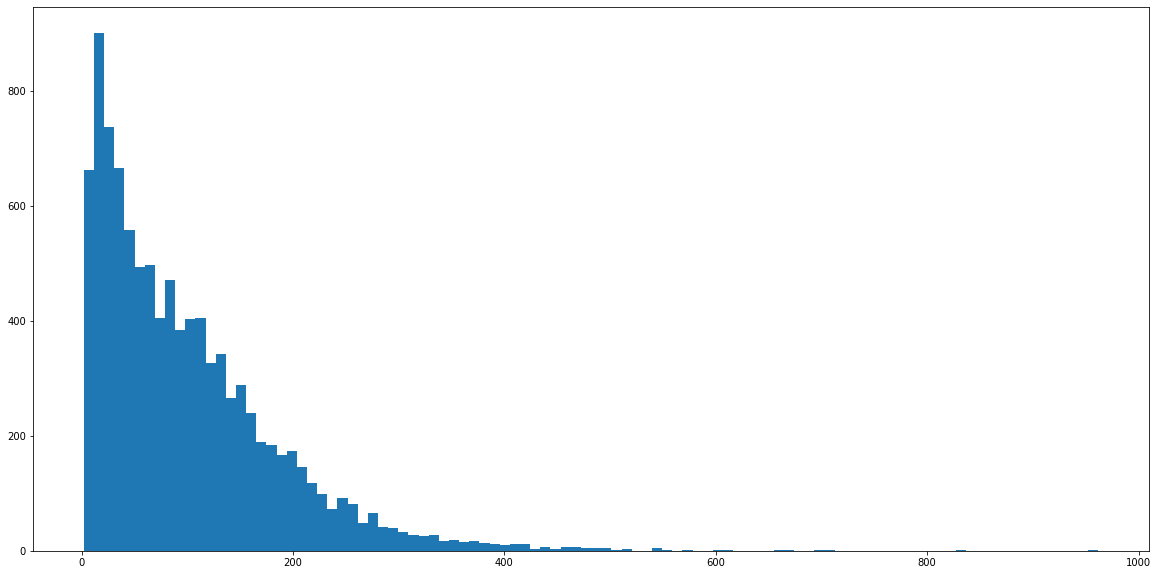

In [22]:
# View distribution of sentence lengths

_ = plt.hist([len(x) for x in novel_sentences_ls], bins=100)

# **Clean and Slice Strings**

In [23]:
def clean_str(dirty_str):
  '''
  INPUT: a raw string
  OUTPUT: a clean string
  '''

  contraction_expanded_str = contractions.fix(dirty_str)

  clean_str = clean(contraction_expanded_str,
      fix_unicode=True,               # fix various unicode errors
      to_ascii=True,                  # transliterate to closest ASCII representation
      lower=True,                     # lowercase text
      no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
      no_urls=False,                  # replace all URLs with a special token
      no_emails=False,                # replace all email addresses with a special token
      no_phone_numbers=False,         # replace all phone numbers with a special token
      no_numbers=False,               # replace all numbers with a special token
      no_digits=False,                # replace all digits with a special token
      no_currency_symbols=False,      # replace all currency symbols with a special token
      no_punct=False,                 # remove punctuations
      # replace_with_punct="",          # instead of removing punctuations you may replace them
      # replace_with_url="<URL>",
      # replace_with_email="<EMAIL>",
      # replace_with_phone_number="<PHONE>",
      # replace_with_number="<NUMBER>",
      # replace_with_digit="0",
      # replace_with_currency_symbol="<CUR>",
      lang="en"                       # set to 'de' for German special handling
  )

  # Replace all new lines/returns with single whitespace
  clean_str = ' '.join(clean_str.split())
  # clean_str = clean_str.replace('\n\r', ' ')
  # clean_str = clean_str.replace('\n', ' ')
  # clean_str = clean_str.replace('\r', ' ')
  # clean_str = ' '.join(clean_str.split())

  # Strip unpaired leading/trailing quotes
  if (clean_str.count('"') % 2 == 1):
    clean_str = clean_str.strip('"')
  if (clean_str.count("'") % 2 == 1):
    clean_str = clean_str.strip("'")

  return clean_str 

# Test

clean_str("This \n\n\n is a very dirty DIRTY StrInG!!")
clean_str('"up!')
clean_str('"Watch out!" he said.')

'this is a very dirty dirty string!!'

'up!'

'"watch out!" he said.'

In [24]:
# Verify

# verify_novel(novel_clean_str, index_ends=500)

In [25]:
# Create sentiment_df to hold text sentences and corresponding sentiment values

sentiment_df = pd.DataFrame({'text_raw': novel_sentences_ls})
sentiment_df['text_raw'] = sentiment_df['text_raw'].astype('string')
sentiment_df['text_raw'] = sentiment_df['text_raw'].str.strip()

sentiment_df.head()
sentiment_df.info()

,text_raw
0,Chapter 1 My father's family name being Pirri...
1,"So, I called myself Pip, and came to be called..."
2,"I give Pirrip as my father's family name, on t..."
3,"Joe Gargery, who married the blacksmith."
4,"As I never saw my father or my mother, and nev..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text_raw  9851 non-null   string
dtypes: string(1)
memory usage: 77.1 KB


In [26]:
# clean the 'text_raw' column and create the 'text_clean' column

# novel_df['text_clean'] = hero.clean(novel_df['text_raw'])
sentiment_df['text_clean'] = sentiment_df['text_raw'].apply(lambda x: clean_str(x))
sentiment_df['text_clean'] = sentiment_df['text_clean'].astype('string')
sentiment_df['text_raw_len'] = sentiment_df['text_raw'].apply(lambda x: len(x))

sentiment_df.head()
sentiment_df.info()

,text_raw,text_clean,text_raw_len
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_raw      9851 non-null   string
 1   text_clean    9851 non-null   string
 2   text_raw_len  9851 non-null   int64 
dtypes: int64(1), string(2)
memory usage: 231.0 KB


In [27]:
# Drop Sentence if Raw length < 1 (Double check)

# sentiment_df = sentiment_df[sentiment_df['text_raw_len'] > 0]

print(f"\n\nThere are {sentiment_df['text_raw'].isna().sum()} BLANK [text_raw] lines")

print(f"There are {sentiment_df['text_clean'].isna().sum()} BLANK [text_clean] lines")

sentiment_df.shape



There are 0 BLANK [text_raw] lines
There are 0 BLANK [text_clean] lines


(9851, 3)

In [28]:
sentiment_df.sort_values(by=['text_raw_len']).head(20)

,text_raw,text_clean,text_raw_len
2343,O!,o!,2
2137,J.,j.,2
2358,O!,o!,2
2339,O!,o!,2
2340,O!,o!,2
6517,Ah!,ah!,3
2889,Ah!,ah!,3
17,"""O!",o!,3
2359,"O!""",o!,3
9119,No.,no.,3


# **Sentiment Analysis**

## **OPTION (a): Upload Sentiment Datafile**

In [ ]:
%%time

# NOTE: 1m07s

# Upload Plain Text File
uploaded = files.upload()

# NOTE: Allows for multiple file uploads, will only process the last
#       Left in for future feature addition (processing multiple files at once)
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  novel_filename_str = fn

# Extract from Dict and decode binary into char string
novel_raw_str = uploaded[novel_filename_str].decode(TEXT_ENCODING)

Saving novel_sentiment_pkdick_doandroidsdreamofelectricsheep.csv to novel_sentiment_pkdick_doandroidsdreamofelectricsheep.csv
User uploaded file "novel_sentiment_pkdick_doandroidsdreamofelectricsheep.csv" with length 1057947 bytes
CPU times: user 175 ms, sys: 15.9 ms, total: 191 ms
Wall time: 16.7 s


In [ ]:
#@title Enter Novel_Title in the form [Title] by [Author]

Novel_Title = "Do Androids Dream of Electric Sheep by Philip K. Dick" #@param {type:"string"}

# Remove illegal filename punctuation
Novel_Title = Novel_Title.replace("'","")
Novel_Title = Novel_Title.replace('"','')
Novel_Title = Novel_Title.replace('.',' ')

novel_title_str = ' '.join([x.capitalize() for x in slugify(Novel_Title).replace('-',' ').split()])
novel_title_str

'Do Androids Dream Of Electric Sheep By Philip K Dick'

In [ ]:
sentiment_df = pd.read_csv(novel_filename_str, index_col=[0])
sentiment_df.head()
sentiment_df.info()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do androids dream of electric sheep?,36,0.2500,0.0000,-0.978523,-0.990126
1,ONE\r\n\r\n\r\nA merry little surge of electri...,one a merry little surge of electricity piped ...,127,0.2732,-0.1875,0.962652,0.998224
2,Surprised - it always surprised him to find hi...,surprised - it always surprised him to find hi...,155,0.4215,0.1500,0.946610,0.996304
3,"Now, in her bed, his wife Iran opened her gray...","now, in her bed, his wife iran opened her gray...",108,0.0000,0.0000,-0.910788,-0.998246
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he said to her.,47,-0.4404,-0.3750,-0.999301,-0.999424


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5664 entries, 0 to 5663
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      5664 non-null   object 
 1   text_clean    5664 non-null   object 
 2   text_raw_len  5664 non-null   int64  
 3   vader         5664 non-null   float64
 4   textblob      5664 non-null   float64
 5   distilbert    5664 non-null   float64
 6   roberta       5664 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 354.0+ KB


## **OPTION (b): Calculate Sentiments and Save**

### **VADER**

In [29]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 15.7 MB/s 


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

In [31]:
vader_sa.polarity_scores('I love lint')['compound']

0.6369

In [32]:
sentiment_df['vader'] = sentiment_df['text_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
sentiment_df.head(10)

,text_raw,text_clean,text_raw_len,vader
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612
5,"The shape of the letters on my father's, gave ...","the shape of the letters on my father's, gave ...",122,-0.1531
6,From the character and turn of the inscription...,from the character and turn of the inscription...,152,-0.2960
7,"To five little stone lozenges, each about a fo...","to five little stone lozenges, each about a fo...",459,0.4404
8,"Ours was the marsh country, down by the river,...","ours was the marsh country, down by the river,...",99,0.0000
9,My first most vivid and broad impression of th...,my first most vivid and broad impression of th...,145,0.5423


### **TextBlob**

In [33]:
from textblob import TextBlob

In [34]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(testimonial.sentiment.polarity)

0.39166666666666666


In [35]:
sentiment_df['textblob'] = sentiment_df['text_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
sentiment_df.head(10)

,text_raw,text_clean,text_raw_len,vader,textblob
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.250000
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.000000
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.000000
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.250000
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.100000
5,"The shape of the letters on my father's, gave ...","the shape of the letters on my father's, gave ...",122,-0.1531,-0.161111
6,From the character and turn of the inscription...,from the character and turn of the inscription...,152,-0.2960,-0.304762
7,"To five little stone lozenges, each about a fo...","to five little stone lozenges, each about a fo...",459,0.4404,-0.070238
8,"Ours was the marsh country, down by the river,...","ours was the marsh country, down by the river,...",99,0.0000,-0.155556
9,My first most vivid and broad impression of th...,my first most vivid and broad impression of th...,145,0.5423,0.201122


### **DistilBERT**

* https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

In [37]:
# Load tokenizer and model, create trainer

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [38]:
# Create class for data preparation

class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [39]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_distilbert_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  return sentiment_signed_ls, label_ls

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [40]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This']
sentiment_signed_ls, label_ls = get_distilbert_sentiment(line_ls)

print(f'sentiment_signed_ls:\n  {sentiment_signed_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 5
  Batch size = 8


sentiment_signed_ls:
  [0.9998562, -0.9997524619102478, 0.9998695, 0.95023483, 0.99314415]
label_ls:
  0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    POSITIVE
4    POSITIVE
dtype: object


In [41]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_distilbert_sentiment(text_clean_ls)

sentiment_df['distilbert'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      9851 non-null   string 
 1   text_clean    9851 non-null   string 
 2   text_raw_len  9851 non-null   int64  
 3   vader         9851 non-null   float64
 4   textblob      9851 non-null   float64
 5   distilbert    9851 non-null   float64
dtypes: float64(3), int64(1), string(2)
memory usage: 461.9 KB
CPU times: user 1min, sys: 426 ms, total: 1min
Wall time: 1min 9s


In [42]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128


In [43]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


### **BERT**

Seethal/sentiment_analysis_generic_dataset

* https://huggingface.co/Seethal/sentiment_analysis_generic_dataset?text=I+like+you.+I+love+you

In [82]:
# Load tokenizer and model, create trainer

model_name = "Seethal/sentiment_analysis_generic_dataset"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--Seethal--sentiment_analysis_generic_dataset/snapshots/26edc13094473094204e42245018bee141699c8c/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--Seethal--sentiment_analysis_generic_dataset/snapshots/26edc13094473094204e42245018bee141699c8c/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--Seethal--sentiment_analysis_generic_dataset/snapshots/26edc13094473094204e42245018bee141699c8c/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Seethal--sentiment_analysis_generic_dataset/snapshots/26edc13094473094204e42245018bee141699c8c/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Seethal--sentiment_analysis_generic_dataset/snapshots/26edc13094473094204e42245018

In [83]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_bert_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'LABEL_0': -1.0, 'LABEL_1': 0.0, 'LABEL_2': 1.0}.get(x, 'na') for x in label_ls]
  label_translated_ls = [{'LABEL_0': 'NEGATIVE', 'LABEL_1': 'NEUTRAL', 'LABEL_2': 'POSITIVE'}.get(x, 'na') for x in label_ls]

  return sentiment_ls, label_translated_ls

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs


In [84]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_bert_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 10
  Batch size = 8


sentiment_ls:
  [1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 0.0, 1.0, 1.0, -1.0]
label_ls:
  ['POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEGATIVE']


In [85]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_bert_sentiment(text_clean_ls)

sentiment_df['bert'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      9851 non-null   string 
 1   text_clean    9851 non-null   string 
 2   text_raw_len  9851 non-null   int64  
 3   vader         9851 non-null   float64
 4   textblob      9851 non-null   float64
 5   distilbert    9851 non-null   float64
 6   roberta       9851 non-null   float64
 7   berttweet     9851 non-null   float64
 8   multibert     9851 non-null   float64
 9   bert          9851 non-null   float64
dtypes: float64(7), int64(1), string(2)
memory usage: 769.7 KB
CPU times: user 1min 7s, sys: 264 ms, total: 1min 7s
Wall time: 1min 12s


In [86]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,berttweet,multibert,bert
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0


### **MultiBERT NLPTown**

In [62]:
# Load tokenizer and model, create trainer

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlptown--bert-base-multilingual-uncased-sentiment/snapshots/e06857fdb0325a7798a8fc361b417dfeec3a3b98/config.json
Model config BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 star",
    "1": "2 stars",
    "2": "3 stars",
    "3": "4 stars",
    "4": "5 stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 star": 0,
    "2 stars": 1,
    "3 stars": 2,
    "4 stars": 3,
    "5 stars": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  

In [66]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_multibert_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'1 star': 0, '2 stars': 0.25, '3 stars': 0.5, '4 stars':0.75, '5 stars':1.0}.get(x, 'na') for x in label_ls]

  return sentiment_ls, label_ls

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


In [64]:
# List comprehension with map translation of 'n star(s)' to 0.0 to 1.0 by 0.25

n = '2 stars'
x = {'1 star': 0, '2 stars': 0.25, '3 stars': 0.5, '4 stars':0.75, '5 stars':1.0}.get(n, 'na')
print(f'x = {x}')


n_ls = ['1 star', '5 stars', '3 stars', '2 stars', '4 stars', '4 stars', '1 star']
x_ls = [{'1 star': 0, '2 stars': 0.25, '3 stars': 0.5, '4 stars':0.75, '5 stars':1.0}.get(x, 'na') for x in n_ls]
x_ls

x = 0.25


[0, 1.0, 0.5, 0.25, 0.75, 0.75, 0]

In [67]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This sucks. Awful and Terrible.']
sentiment_ls, label_ls = get_multibert_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 5
  Batch size = 8


sentiment_ls:
  [0.75, 0.5, 1.0, 0.75, 0]
label_ls:
  0    4 stars
1    3 stars
2    5 stars
3    4 stars
4     1 star
dtype: object


In [68]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_multibert_sentiment(text_clean_ls)

sentiment_df['multibert'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      9851 non-null   string 
 1   text_clean    9851 non-null   string 
 2   text_raw_len  9851 non-null   int64  
 3   vader         9851 non-null   float64
 4   textblob      9851 non-null   float64
 5   distilbert    9851 non-null   float64
 6   roberta       9851 non-null   float64
 7   bert          9851 non-null   float64
 8   multibert     9851 non-null   float64
dtypes: float64(6), int64(1), string(2)
memory usage: 692.8 KB
CPU times: user 2min 18s, sys: 722 ms, total: 2min 19s
Wall time: 2min 40s


In [69]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,bert,multibert
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,-1.0,0.25
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,-1.0,0.25


In [70]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Fine-Tuned Sentiment RoBERTa**

* https://huggingface.co/siebert/sentiment-roberta-large-english (RoBERTa Large)

In [45]:
# Import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [46]:
# Load tokenizer and model, create trainer
model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/256 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/687 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/config.json
Model config RobertaConfig {
  "_name_or_path": "siebert/sentiment-roberta-large-english",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6e

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [47]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_roberta_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  preds = predictions.predictions.argmax(-1)
  label_ls = pd.Series(preds).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  # Create DataFrame with texts, predictions, labels, and scores
  df = pd.DataFrame(list(zip(text_clean_ls,preds,label_ls,score_ls)), columns=['text','pred','label','score'])

  return sentiment_signed_ls, label_ls

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


In [48]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.']
sentiment_signed_ls, label_ls = get_roberta_sentiment(line_ls)

print(f'sentiment_signed_ls:\n  {sentiment_signed_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 4
  Batch size = 8


sentiment_signed_ls:
  [0.9986568, -0.999409019947052, 0.9987269, -0.9994855523109436]
label_ls:
  0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    NEGATIVE
dtype: object


In [49]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_roberta_sentiment(text_clean_ls)

sentiment_df['roberta'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      9851 non-null   string 
 1   text_clean    9851 non-null   string 
 2   text_raw_len  9851 non-null   int64  
 3   vader         9851 non-null   float64
 4   textblob      9851 non-null   float64
 5   distilbert    9851 non-null   float64
 6   roberta       9851 non-null   float64
dtypes: float64(4), int64(1), string(2)
memory usage: 538.9 KB
CPU times: user 5min 53s, sys: 1.14 s, total: 5min 55s
Wall time: 6min 25s


In [50]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897


In [51]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


### **BERT Tweet**

* finiteautomata/bertweet-base-sentiment-analysis (a RoBERTa Model)

* ~40k Tweets (SemEval 2017 corpus)

* https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis?text=I+like+you.+I+love+you

In [71]:
# Load tokenizer and model, create trainer

model_name = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-sentiment-analysis/snapshots/cf6b0f60e84096e077c171fe3176093674370291/config.json
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": 

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-sentiment-analysis/snapshots/cf6b0f60e84096e077c171fe3176093674370291/vocab.txt
loading file bpe.codes from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-sentiment-analysis/snapshots/cf6b0f60e84096e077c171fe3176093674370291/bpe.codes
loading file added_tokens.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-sentiment-analysis/snapshots/cf6b0f60e84096e077c171fe3176093674370291/added_tokens.json
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-sentiment-analysis/snapshots/cf6b0f60e84096e077c171fe3176093674370291/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-sentiment-analysis/snapshots/cf6b0f60e84096e077c171fe3176093674370291/tokenizer_config.json
loading conf

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-sentiment-analysis/snapshots/cf6b0f60e84096e077c171fe3176093674370291/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [74]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_bertTweet_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'NEG': -1.0, 'NEU': 0.0, 'POS': 1.0}.get(x, 'na') for x in label_ls]
  label_translated_ls = [{'NEG': 'NEGATIVE', 'NEU': 'NEUTRAL', 'POS': 'POSITIVE'}.get(x, 'na') for x in label_ls]

  return sentiment_ls, label_translated_ls

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 19.3 µs


In [75]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_bertTweet_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 10
  Batch size = 8


sentiment_ls:
  [1.0, -1.0, 1.0, -1.0, -1.0, 0.0, 0.0, 1.0, 1.0, -1.0]
label_ls:
  ['POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEGATIVE']


In [76]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_bertTweet_sentiment(text_clean_ls)

sentiment_df['bert_tweet'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      9851 non-null   string 
 1   text_clean    9851 non-null   string 
 2   text_raw_len  9851 non-null   int64  
 3   vader         9851 non-null   float64
 4   textblob      9851 non-null   float64
 5   distilbert    9851 non-null   float64
 6   roberta       9851 non-null   float64
 7   bert          9851 non-null   float64
 8   multibert     9851 non-null   float64
dtypes: float64(6), int64(1), string(2)
memory usage: 692.8 KB
CPU times: user 59 s, sys: 305 ms, total: 59.3 s
Wall time: 1min 15s


In [91]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,berttweet,multibert,bert
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0


In [87]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **RoBERTa Tweet**

* cardiffnlp/twitter-roberta-base-sentiment-latest

* ~124M Tweets Jan2018-Dec2021

* https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21



In [140]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment-latest/snapshots/a9027cdcfdcee766a9e67f62aa966451bdaad620/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment-latest",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative",
    "1": "neutral",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 0,
    "neutral": 1,
    "positive": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attent

In [148]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_robertTweet_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)
  print(f'predictions: {predictions}')
  
  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Create DataFrame with texts, predictions, labels, and scores
  # line_no_ls = list(range(len(sentiment_ls)))
  # distilbert_df = pd.DataFrame(list(zip(line_no_ls, text_clean_ls,sentiment_ls,label_ls,score_ls)), columns=['line_no','line','sentiment','label','score'])
  # distilbert_df.head()

  # Adjust for POS/NEG sign
  sentiment_ls = sentiment_ls
  label_translated_ls = label_ls

  # label_score_ls = list(zip(label_ls,score_ls))
  # sentiment_ls = [{'NEG': -1.0, 'NEU': 0.0, 'POS': 1.0}.get(x, 'na') for x in label_ls]
  # label_translated_ls = [{'NEG': 'NEGATIVE', 'NEU': 'NEUTRAL', 'POS': 'POSITIVE'}.get(x, 'na') for x in label_ls]
  # sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  # print(f'label_ls:\n  {label_ls[:sample_size]}')
  # print(f'        type(label_ls[0]): {type(label_ls[0])}')
  # print(f'             label_ls[0] : {label_ls[0]}')
  # print(f'score_ls:\n {score_ls[:sample_size]}')

  return sentiment_ls, label_translated_ls

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


In [149]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_robertTweet_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 10
  Batch size = 8


predictions: PredictionOutput(predictions=array([[-1.8532342 ,  0.06845453,  1.434776  ],
       [ 1.6079055 ,  0.13045256, -1.8171712 ],
       [-2.1203086 , -1.0498896 ,  3.245281  ],
       [ 1.7336838 ,  0.19748807, -2.1388457 ],
       [ 2.4584916 , -0.67966264, -2.285457  ],
       [-1.2016096 ,  0.7750721 , -0.0092159 ],
       [-1.0134642 ,  0.7749823 , -0.2829275 ],
       [-1.9408208 , -0.27562824,  1.9672251 ],
       [-2.0504262 , -1.1600907 ,  3.2132897 ],
       [ 2.3003767 , -0.48863307, -2.1530821 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 0.0596, 'test_samples_per_second': 167.837, 'test_steps_per_second': 33.567})
sentiment_ls:
  [2 0 2 0 0 1 1 2 2 0]
label_ls:
  0    positive
1    negative
2    positive
3    negative
4    negative
5     neutral
6     neutral
7    positive
8    positive
9    negative
dtype: object


In [150]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_robertTweet_sentiment(text_clean_ls)

sentiment_df['roberta_tweet'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


predictions: PredictionOutput(predictions=array([[-0.71495396,  1.2987947 , -0.83618385],
       [-1.3350942 ,  1.5455468 , -0.25438857],
       [-1.5458597 ,  2.0561066 , -0.65405864],
       ...,
       [-3.0606334 ,  1.7002989 ,  1.5134628 ],
       [-2.19487   ,  2.0702586 ,  0.00899576],
       [-2.0130336 ,  1.3607581 ,  0.42079005]], dtype=float32), label_ids=None, metrics={'test_runtime': 130.6243, 'test_samples_per_second': 75.415, 'test_steps_per_second': 9.432})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_raw         9851 non-null   string 
 1   text_clean       9851 non-null   string 
 2   text_raw_len     9851 non-null   int64  
 3   vader            9851 non-null   float64
 4   textblob         9851 non-null   float64
 5   distilbert       9851 non-null   float64
 6   roberta          9851 non-null   float64
 

In [151]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,bert_tweet,multibert,bert,roberta_tweet,distilbert_imdb,bert_imdb,roberta_imdb,finbert,finroberta
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0,1,-1.0,1.0,-1.0,0.0,0.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0,1,1.0,1.0,1.0,0.0,0.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0,1,1.0,1.0,1.0,0.0,0.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0,1,-1.0,1.0,1.0,0.0,0.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0,0,-1.0,1.0,1.0,0.0,0.0


In [154]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **DistilBERT IMDB**

* lvwerra/distilbert-imdb

* https://huggingface.co/lvwerra/distilbert-imdb?text=I+like+you.+I+love+you

In [99]:
# Load tokenizer and model, create trainer

model_name = "lvwerra/distilbert-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--lvwerra--distilbert-imdb/snapshots/b767fcc39b82b12797126b964f8ac8617317436d/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--lvwerra--distilbert-imdb/snapshots/b767fcc39b82b12797126b964f8ac8617317436d/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--lvwerra--distilbert-imdb/snapshots/b767fcc39b82b12797126b964f8ac8617317436d/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--lvwerra--distilbert-imdb/snapshots/b767fcc39b82b12797126b964f8ac8617317436d/tokenizer_config.json


Downloading:   0%|          | 0.00/735 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--lvwerra--distilbert-imdb/snapshots/b767fcc39b82b12797126b964f8ac8617317436d/config.json
Model config DistilBertConfig {
  "_name_or_path": "lvwerra/distilbert-imdb",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.25.1",
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--lvwerra--distilbert-imdb/snapshots/b767fcc39b82b12797126b964f8ac8617317436d/pytorch_model.bin
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at lvwerra/distilbert-imdb.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [100]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_distilbertimdb_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'NEGATIVE': -1.0, 'POSITIVE': 1.0}.get(x, 'na') for x in label_ls]

  return sentiment_ls, label_ls

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [101]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_distilbertimdb_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 10
  Batch size = 8


sentiment_ls:
  [1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0]
label_ls:
  0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    NEGATIVE
4    NEGATIVE
5    POSITIVE
6    POSITIVE
7    POSITIVE
8    POSITIVE
9    NEGATIVE
dtype: object


In [102]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_distilbertimdb_sentiment(text_clean_ls)

sentiment_df['distilbert_imdb'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_raw         9851 non-null   string 
 1   text_clean       9851 non-null   string 
 2   text_raw_len     9851 non-null   int64  
 3   vader            9851 non-null   float64
 4   textblob         9851 non-null   float64
 5   distilbert       9851 non-null   float64
 6   roberta          9851 non-null   float64
 7   bert_tweet       9851 non-null   float64
 8   multibert        9851 non-null   float64
 9   bert             9851 non-null   float64
 10  roberta_tweet    9851 non-null   object 
 11  distilbert_imdb  9851 non-null   float64
dtypes: float64(8), int64(1), object(1), string(2)
memory usage: 923.7+ KB
CPU times: user 1min 6s, sys: 265 ms, total: 1min 6s
Wall time: 1min 12s


In [104]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,bert_tweet,multibert,bert,roberta_tweet,distilbert_imdb
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0,na,-1.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0,na,1.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0,na,1.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0,na,-1.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0,na,-1.0


In [103]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **BERT IMDB**

* textattack/bert-base-uncased-imdb

* https://huggingface.co/textattack/bert-base-uncased-imdb?text=I+like+you.+I+love+you

In [105]:
# Load tokenizer and model, create trainer

model_name = "textattack/bert-base-uncased-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--textattack--bert-base-uncased-imdb/snapshots/c70b9f391af2067f7eff69a03940218bba9b8d39/config.json
Model config BertConfig {
  "_name_or_path": "textattack/bert-base-uncased-imdb",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "finetuning_task": "imdb",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--textattack--bert-base-uncased-imdb/snapshots/c70b9f391af2067f7eff69a03940218bba9b8d39/vocab.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--textattack--bert-base-uncased-imdb/snapshots/c70b9f391af2067f7eff69a03940218bba9b8d39/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--textattack--bert-base-uncased-imdb/snapshots/c70b9f391af2067f7eff69a03940218bba9b8d39/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--textattack--bert-base-uncased-imdb/snapshots/c70b9f391af2067f7eff69a03940218bba9b8d39/config.json
Model config BertConfig {
  "_name_or_path": "textattack/bert-base-uncased-imdb",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attent

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--textattack--bert-base-uncased-imdb/snapshots/c70b9f391af2067f7eff69a03940218bba9b8d39/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at textattack/bert-base-uncased-imdb.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [106]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_bertimdb_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'LABEL_0': -1.0, 'LABEL_1': 1.0}.get(x, 'na') for x in label_ls]
  label_translated_ls = [{'LABEL_0': 'NEGATIVE', 'LABEL_1': 'POSITIVE'}.get(x, 'na') for x in label_ls]
  # sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  print(f'label_ls:\n  {label_ls[:sample_size]}')
  print(f'score_ls:\n {score_ls[:sample_size]}')

  return sentiment_ls, label_translated_ls

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs


In [107]:
# Test

line_ls = ['I hate that','That is annoying','This is great!','Wouldn´t recommend it.', 
           'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_bertimdb_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 10
  Batch size = 8


label_ls:
  0    LABEL_0
1    LABEL_0
2    LABEL_1
3    LABEL_0
4    LABEL_0
5    LABEL_0
6    LABEL_0
7    LABEL_1
8    LABEL_1
9    LABEL_0
dtype: object
score_ls:
 [0.8935311  0.88449055 0.967668   0.9588851  0.86568046 0.6707777
 0.60284334 0.99754816 0.9956289  0.68876314]
sentiment_ls:
  [-1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0]
label_ls:
  ['NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE']


In [108]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_bertimdb_sentiment(text_clean_ls)

sentiment_df['bert_imdb'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


label_ls:
  0    LABEL_1
1    LABEL_1
2    LABEL_1
3    LABEL_1
4    LABEL_1
5    LABEL_1
6    LABEL_0
7    LABEL_1
8    LABEL_1
9    LABEL_1
dtype: object
score_ls:
 [0.8502517  0.9470794  0.69485575 0.8867645  0.87417054 0.75581026
 0.9865966  0.9547058  0.8050374  0.99675614]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_raw         9851 non-null   string 
 1   text_clean       9851 non-null   string 
 2   text_raw_len     9851 non-null   int64  
 3   vader            9851 non-null   float64
 4   textblob         9851 non-null   float64
 5   distilbert       9851 non-null   float64
 6   roberta          9851 non-null   float64
 7   bert_tweet       9851 non-null   float64
 8   multibert        9851 non-null   float64
 9   bert             9851 non-null   float64
 10  roberta_tweet    9851 non-null   object 
 11  distilbert

In [113]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,bert_tweet,multibert,bert,roberta_tweet,distilbert_imdb,bert_imdb
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0,na,-1.0,1.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0,na,1.0,1.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0,na,1.0,1.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0,na,-1.0,1.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0,na,-1.0,1.0


In [109]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RoBERTa IMDB

* aychang/roberta-base-imdb

* https://huggingface.co/aychang/roberta-base-imdb?text=I+like+you.+I+love+you

In [110]:
# Load tokenizer and model, create trainer

model_name = "aychang/roberta-base-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/255 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--aychang--roberta-base-imdb/snapshots/cb6bcadd0540b61c9623bd6295d51ac445ceb135/config.json
Model config RobertaConfig {
  "_name_or_path": "aychang/roberta-base-imdb",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "neg",
    "1": "pos"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "neg": 0,
    "pos": 1
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_si

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--aychang--roberta-base-imdb/snapshots/cb6bcadd0540b61c9623bd6295d51ac445ceb135/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--aychang--roberta-base-imdb/snapshots/cb6bcadd0540b61c9623bd6295d51ac445ceb135/merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--aychang--roberta-base-imdb/snapshots/cb6bcadd0540b61c9623bd6295d51ac445ceb135/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--aychang--roberta-base-imdb/snapshots/cb6bcadd0540b61c9623bd6295d51ac445ceb135/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--aychang--roberta-base-imdb/snapshots/cb6bcadd0540b61c9623bd6295d51ac445ceb135/config.json
Model config Robert

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--aychang--roberta-base-imdb/snapshots/cb6bcadd0540b61c9623bd6295d51ac445ceb135/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at aychang/roberta-base-imdb.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [111]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_robertaimdb_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'neg': -1.0, 'pos': 1.0}.get(x, 'na') for x in label_ls]
  label_translated_ls = [{'neg': 'NEGATIVE', 'pos': 'POSITIVE'}.get(x, 'na') for x in label_ls]

  return sentiment_ls, label_translated_ls

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [112]:
# Test

line_ls = ['I hate that','That is annoying','This is great!','Wouldn´t recommend it.', 
           'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_robertaimdb_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 10
  Batch size = 8


sentiment_ls:
  [-1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0]
label_ls:
  ['NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE']


In [114]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_robertaimdb_sentiment(text_clean_ls)

sentiment_df['roberta_imdb'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_raw         9851 non-null   string 
 1   text_clean       9851 non-null   string 
 2   text_raw_len     9851 non-null   int64  
 3   vader            9851 non-null   float64
 4   textblob         9851 non-null   float64
 5   distilbert       9851 non-null   float64
 6   roberta          9851 non-null   float64
 7   bert_tweet       9851 non-null   float64
 8   multibert        9851 non-null   float64
 9   bert             9851 non-null   float64
 10  roberta_tweet    9851 non-null   object 
 11  distilbert_imdb  9851 non-null   float64
 12  bert_imdb        9851 non-null   float64
 13  roberta_imdb     9851 non-null   float64
dtypes: float64(10), int64(1), object(1), string(2)
memory usage: 1.1+ MB
CPU times: user 1min 52s, sys: 616 ms, total: 1min 52s
Wall time: 2min 11s


In [116]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,bert_tweet,multibert,bert,roberta_tweet,distilbert_imdb,bert_imdb,roberta_imdb
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0,na,-1.0,1.0,-1.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0,na,1.0,1.0,1.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0,na,1.0,1.0,1.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0,na,-1.0,1.0,1.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0,na,-1.0,1.0,1.0


In [ ]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)

### FinBERT

* ahmedrachid/FinancialBERT-Sentiment-Analysis

* https://huggingface.co/ahmedrachid/FinancialBERT-Sentiment-Analysis?text=Operating+profit+rose+to+EUR+13.1+mn+from+EUR+8.7+mn+in+the+corresponding+period+in+2007+representing+7.7+%25+of+net+sales.

In [117]:
# Load tokenizer and model, create trainer

model_name = "ahmedrachid/FinancialBERT-Sentiment-Analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/369 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/464k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--ahmedrachid--FinancialBERT-Sentiment-Analysis/snapshots/656931965473ec085d195680bd62687b140c038f/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--ahmedrachid--FinancialBERT-Sentiment-Analysis/snapshots/656931965473ec085d195680bd62687b140c038f/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--ahmedrachid--FinancialBERT-Sentiment-Analysis/snapshots/656931965473ec085d195680bd62687b140c038f/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--ahmedrachid--FinancialBERT-Sentiment-Analysis/snapshots/656931965473ec085d195680bd62687b140c038f/tokenizer_config.json


Downloading:   0%|          | 0.00/789 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--ahmedrachid--FinancialBERT-Sentiment-Analysis/snapshots/656931965473ec085d195680bd62687b140c038f/config.json
Model config BertConfig {
  "_name_or_path": "ahmedrachid/FinancialBERT-Sentiment-Analysis",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative",
    "1": "neutral",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 0,
    "neutral": 1,
    "positive": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "tr

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--ahmedrachid--FinancialBERT-Sentiment-Analysis/snapshots/656931965473ec085d195680bd62687b140c038f/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at ahmedrachid/FinancialBERT-Sentiment-Analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [118]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_finbert_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'positive': 1.0, 'neutral': 0.0, 'negative': -1.0}.get(x, 'na') for x in label_ls]

  return sentiment_ls, label_ls

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [119]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_finbert_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 10
  Batch size = 8


sentiment_ls:
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0]
label_ls:
  0     neutral
1     neutral
2     neutral
3     neutral
4     neutral
5     neutral
6     neutral
7     neutral
8    positive
9    negative
dtype: object


In [122]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_finbert_sentiment(text_clean_ls)

sentiment_df['finbert'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_raw         9851 non-null   string 
 1   text_clean       9851 non-null   string 
 2   text_raw_len     9851 non-null   int64  
 3   vader            9851 non-null   float64
 4   textblob         9851 non-null   float64
 5   distilbert       9851 non-null   float64
 6   roberta          9851 non-null   float64
 7   bert_tweet       9851 non-null   float64
 8   multibert        9851 non-null   float64
 9   bert             9851 non-null   float64
 10  roberta_tweet    9851 non-null   object 
 11  distilbert_imdb  9851 non-null   float64
 12  bert_imdb        9851 non-null   float64
 13  roberta_imdb     9851 non-null   float64
 14  finbert          9851 non-null   float64
dtypes: float64(11), int64(1), object(1), string(2)
memory usage: 1.1+ MB
CPU times: user 2min 29s, sys: 735 ms

In [123]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,bert_tweet,multibert,bert,roberta_tweet,distilbert_imdb,bert_imdb,roberta_imdb,finbert
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0,na,-1.0,1.0,-1.0,0.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0,na,1.0,1.0,1.0,0.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0,na,1.0,1.0,1.0,0.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0,na,-1.0,1.0,1.0,0.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0,na,-1.0,1.0,1.0,0.0


In [124]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **FinRoBERTa**

* soleimanian/financial-roberta-large-sentiment

* https://huggingface.co/soleimanian/financial-roberta-large-sentiment

In [125]:
# Load tokenizer and model, create trainer

model_name = "soleimanian/financial-roberta-large-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/936 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--soleimanian--financial-roberta-large-sentiment/snapshots/3300cd14e2494afbddfda6146eb17bd7dad40885/config.json
Model config RobertaConfig {
  "_name_or_path": "soleimanian/financial-roberta-large-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "negative",
    "1": "neutral",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "negative": 0,
    "neutral": 1,
    "positive": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_la

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--soleimanian--financial-roberta-large-sentiment/snapshots/3300cd14e2494afbddfda6146eb17bd7dad40885/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--soleimanian--financial-roberta-large-sentiment/snapshots/3300cd14e2494afbddfda6146eb17bd7dad40885/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--soleimanian--financial-roberta-large-sentiment/snapshots/3300cd14e2494afbddfda6146eb17bd7dad40885/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--soleimanian--financial-roberta-large-sentiment/snapshots/3300cd14e2494afbddfda6146eb17bd7dad40885/special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--soleimanian--financial-roberta-large

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--soleimanian--financial-roberta-large-sentiment/snapshots/3300cd14e2494afbddfda6146eb17bd7dad40885/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at soleimanian/financial-roberta-large-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [126]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_finroberta_sentiment(text_clean_ls, sample_size=10):

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_ls = [{'positive': 1.0, 'neutral': 0.0, 'negative': -1.0}.get(x, 'na') for x in label_ls]
  
  return sentiment_ls, label_ls

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [127]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This sucks. Awful and Terrible.','middle','so-so',
           'I love it','fantastic, terrific, wonderful, good, best',
           'terrible, awful, bad, evil']
sentiment_ls, label_ls = get_finroberta_sentiment(line_ls)

print(f'sentiment_ls:\n  {sentiment_ls}')
print(f'label_ls:\n  {label_ls}')

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
***** Running Prediction *****
  Num examples = 10
  Batch size = 8


sentiment_ls:
  [1.0, -1.0, 1.0, -1.0, -1.0, 0.0, 0.0, 1.0, 1.0, -1.0]
label_ls:
  0    positive
1    negative
2    positive
3    negative
4    negative
5     neutral
6     neutral
7    positive
8    positive
9    negative
dtype: object


In [128]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_finroberta_sentiment(text_clean_ls)

sentiment_df['finroberta'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 9851
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9851 entries, 0 to 9850
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_raw         9851 non-null   string 
 1   text_clean       9851 non-null   string 
 2   text_raw_len     9851 non-null   int64  
 3   vader            9851 non-null   float64
 4   textblob         9851 non-null   float64
 5   distilbert       9851 non-null   float64
 6   roberta          9851 non-null   float64
 7   bert_tweet       9851 non-null   float64
 8   multibert        9851 non-null   float64
 9   bert             9851 non-null   float64
 10  roberta_tweet    9851 non-null   object 
 11  distilbert_imdb  9851 non-null   float64
 12  bert_imdb        9851 non-null   float64
 13  roberta_imdb     9851 non-null   float64
 14  finbert          9851 non-null   float64
 15  finroberta       9851 non-null   float64
dtypes: float64(12), int64(1), object(1), string(2)
memory usage:

In [129]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,bert_tweet,multibert,bert,roberta_tweet,distilbert_imdb,bert_imdb,roberta_imdb,finbert,finroberta
0,Chapter 1 My father's family name being Pirri...,chapter 1 my father's family name being pirrip...,162,0.0000,0.25,-0.976661,-0.991244,0.0,0.25,-1.0,na,-1.0,1.0,-1.0,0.0,0.0
1,"So, I called myself Pip, and came to be called...","so, i called myself pip, and came to be called...",51,0.0000,0.00,-0.599726,-0.992488,0.0,0.25,0.0,na,1.0,1.0,1.0,0.0,0.0
2,"I give Pirrip as my father's family name, on t...","i give pirrip as my father's family name, on t...",94,0.0772,0.00,-0.588038,0.982411,0.0,0.75,0.0,na,1.0,1.0,1.0,0.0,0.0
3,"Joe Gargery, who married the blacksmith.","joe gargery, who married the blacksmith.",40,0.0000,0.25,0.992593,0.986067,0.0,0.75,0.0,na,-1.0,1.0,1.0,0.0,0.0
4,"As I never saw my father or my mother, and nev...","as i never saw my father or my mother, and nev...",239,0.3612,0.10,-0.996128,-0.995897,0.0,0.25,-1.0,na,-1.0,1.0,1.0,0.0,0.0


In [135]:
sentiment_df.roberta_tweet.value_counts()

na    9851
Name: roberta_tweet, dtype: int64

In [136]:
# Save

filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')

files.download(filename_sentiment)



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_great_expectations_charles_dickens.csv] <<<<<


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Plot Sentiment**

In [171]:
# Create a list of model from DataFrame columns

col_ls = list(sentiment_df.columns)

model_ls = list(set(col_ls) - set(['text_raw','text_clean','text_raw_len']))
model_ls = [x for x in model_ls if not('_sma' in x)]
model_ls = [x for x in model_ls if not('_stdscaler' in x)]
model_ls

['roberta_imdb',
 'finbert',
 'bert_tweet',
 'roberta_tweet',
 'textblob',
 'roberta',
 'finroberta',
 'SeqNo',
 'bert_imdb',
 'bert',
 'distilbert',
 'vader',
 'multibert',
 'distilbert_imdb']

In [157]:
# Insert a unique SeqNo

sentiment_df.insert(0, 'SeqNo', list(range(0, sentiment_df.shape[0])))

In [ ]:
sentiment_df.head()

,SeqNo,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta
0,0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do androids dream of electric sheep?,36,0.2500,0.0000,-0.978523,-0.990126
1,1,ONE\r\n\r\n\r\nA merry little surge of electri...,one a merry little surge of electricity piped ...,127,0.2732,-0.1875,0.962652,0.998224
2,2,Surprised - it always surprised him to find hi...,surprised - it always surprised him to find hi...,155,0.4215,0.1500,0.946610,0.996304
3,3,"Now, in her bed, his wife Iran opened her gray...","now, in her bed, his wife iran opened her gray...",108,0.0000,0.0000,-0.910788,-0.998246
4,4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he said to her.,47,-0.4404,-0.3750,-0.999301,-0.999424


In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
import matplotlib
print(matplotlib.__version__)

3.2.2


"\n# place a text box in upper left in axes coords\nprops = dict(boxstyle='round', facecolor='white', alpha=0.5)\n_ = plt.text(0.05, -2.0, model_mean_str, \n             # transform=plt.transAxes, \n             fontsize=10,\n             verticalalignment='top', \n             bbox=props)\n"

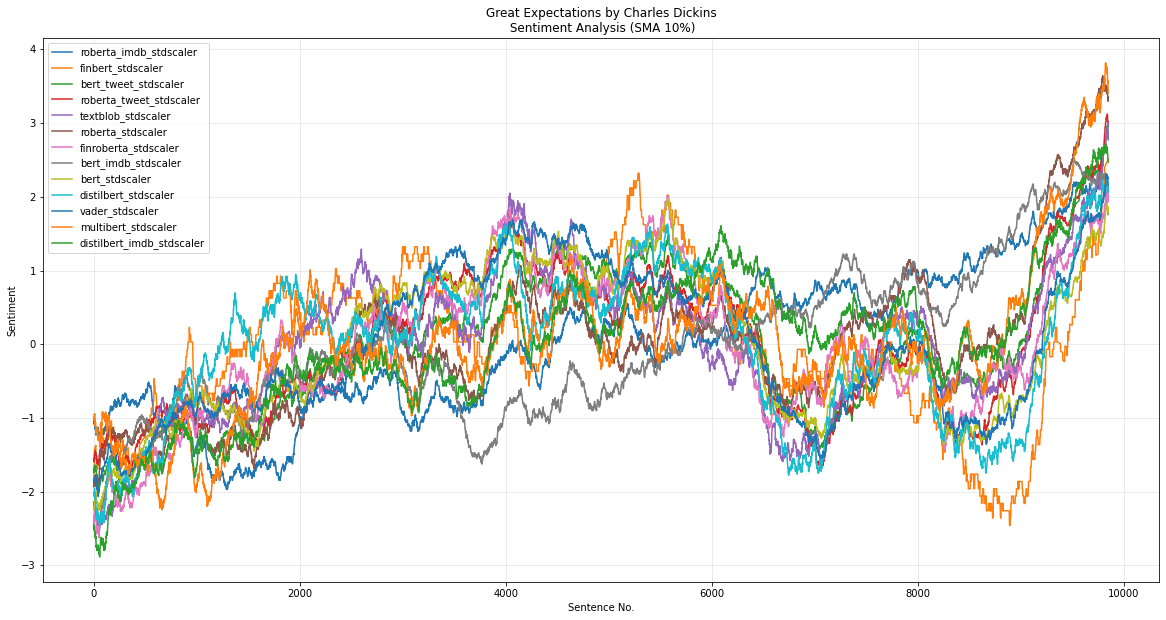

Model Raw Means

roberta_imdb = 0.47
finbert = -0.01
bert_tweet = -0.04
roberta_tweet = 0.96
textblob = 0.05
roberta = -0.16
finroberta = -0.19
bert_imdb = 0.47
bert = -0.09
distilbert = -0.05
vader = 0.07
multibert = 0.45
distilbert_imdb = 0.12



In [185]:
#@title Enter the Sliding Window width as Percent of Novel length (default 10%, larger=smoother)

_ = plt.rcParams['figure.figsize'] = [20, 10]

# Dict of sentiment model means
sentiment_mean_dt = {}

# Resest list of model from DataFrame columns
col_ls = list(sentiment_df.columns)
model_ls = list(set(col_ls) - set(['SeqNo','text_raw','text_clean','text_raw_len']))
model_ls = [x for x in model_ls if not('_sma' in x)]
model_ls = [x for x in model_ls if not('_stdscaler' in x)]
# model_ls

window_percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_per = int(window_percent/100 * sentiment_df.shape[0])

# Create list of model with SMA
col_sma_ls = []
for i, amodel in enumerate(model_ls):
  col_str = f'{amodel}_sma{window_percent}'
  sentiment_df[col_str] = sentiment_df[amodel].rolling(win_per, center=True, min_periods=1).mean()
  sentiment_mean_dt[amodel] = sentiment_df[amodel].mean()
  col_sma_ls.append(col_str)

# Create list of model cols that are normed by stdscaler
sentiment_model_norm_ls = []
for i, amodel in enumerate(model_ls):
  norm_str = f"{amodel}_stdscaler"
  sentiment_model_norm_ls.append(norm_str)

# Normalize Time Series to same y-range
sentiment_df[sentiment_model_norm_ls] = StandardScaler().fit_transform(sentiment_df[col_sma_ls])

sentiment_df[sentiment_model_norm_ls].plot(y=sentiment_model_norm_ls) # , x='SeqNo')

_ = plt.title(f'{Novel_Title}\n Sentiment Analysis (SMA {window_percent}%)')
_ = plt.ylabel('Sentiment')
_ = plt.xlabel('Sentence No.')
_ = plt.grid(True, alpha=0.3)
_ = plt.legend(loc='best')

model_mean_str = 'Model Raw Means\n\n'
for amodel, amean in sentiment_mean_dt.items():
  model_mean_str += f'{amodel} = {amean:.2f}\n'
  # _ = plt.axhline(y = amean, label='book', color='red', linestyle='--', alpha=0.4)

"""
# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
_ = plt.text(0.05, -2.0, model_mean_str, 
             # transform=plt.transAxes, 
             fontsize=10,
             verticalalignment='top', 
             bbox=props)
"""

_ = plt.show();

print(model_mean_str)

# **Crux Detection**

In [190]:
# Resest list of model from DataFrame columns
col_ls = list(sentiment_df.columns)
model_ls = list(set(col_ls) - set(['SeqNo','text_raw','text_clean','text_raw_len']))
model_ls = [x for x in model_ls if not('_sma' in x)]
model_ls = [x for x in model_ls if not('_stdscaler' in x)]
model_str = ""
for amodel in model_ls:
  model_str += f',"{amodel.strip()}"'

# May have to cut-n-paste output string of models into drop-down widget below
print(model_str)

,"roberta_imdb","finbert","bert_tweet","roberta_tweet","textblob","roberta","finroberta","bert_imdb","bert","distilbert","vader","multibert","distilbert_imdb"


In [192]:
#@title Which Lexicon?

Sentiment_Model = "roberta" #@param ["roberta_imdb","finbert","bert_tweet","roberta_tweet","textblob","roberta","finroberta","bert_imdb","bert","distilbert","vader","multibert","distilbert_imdb"]

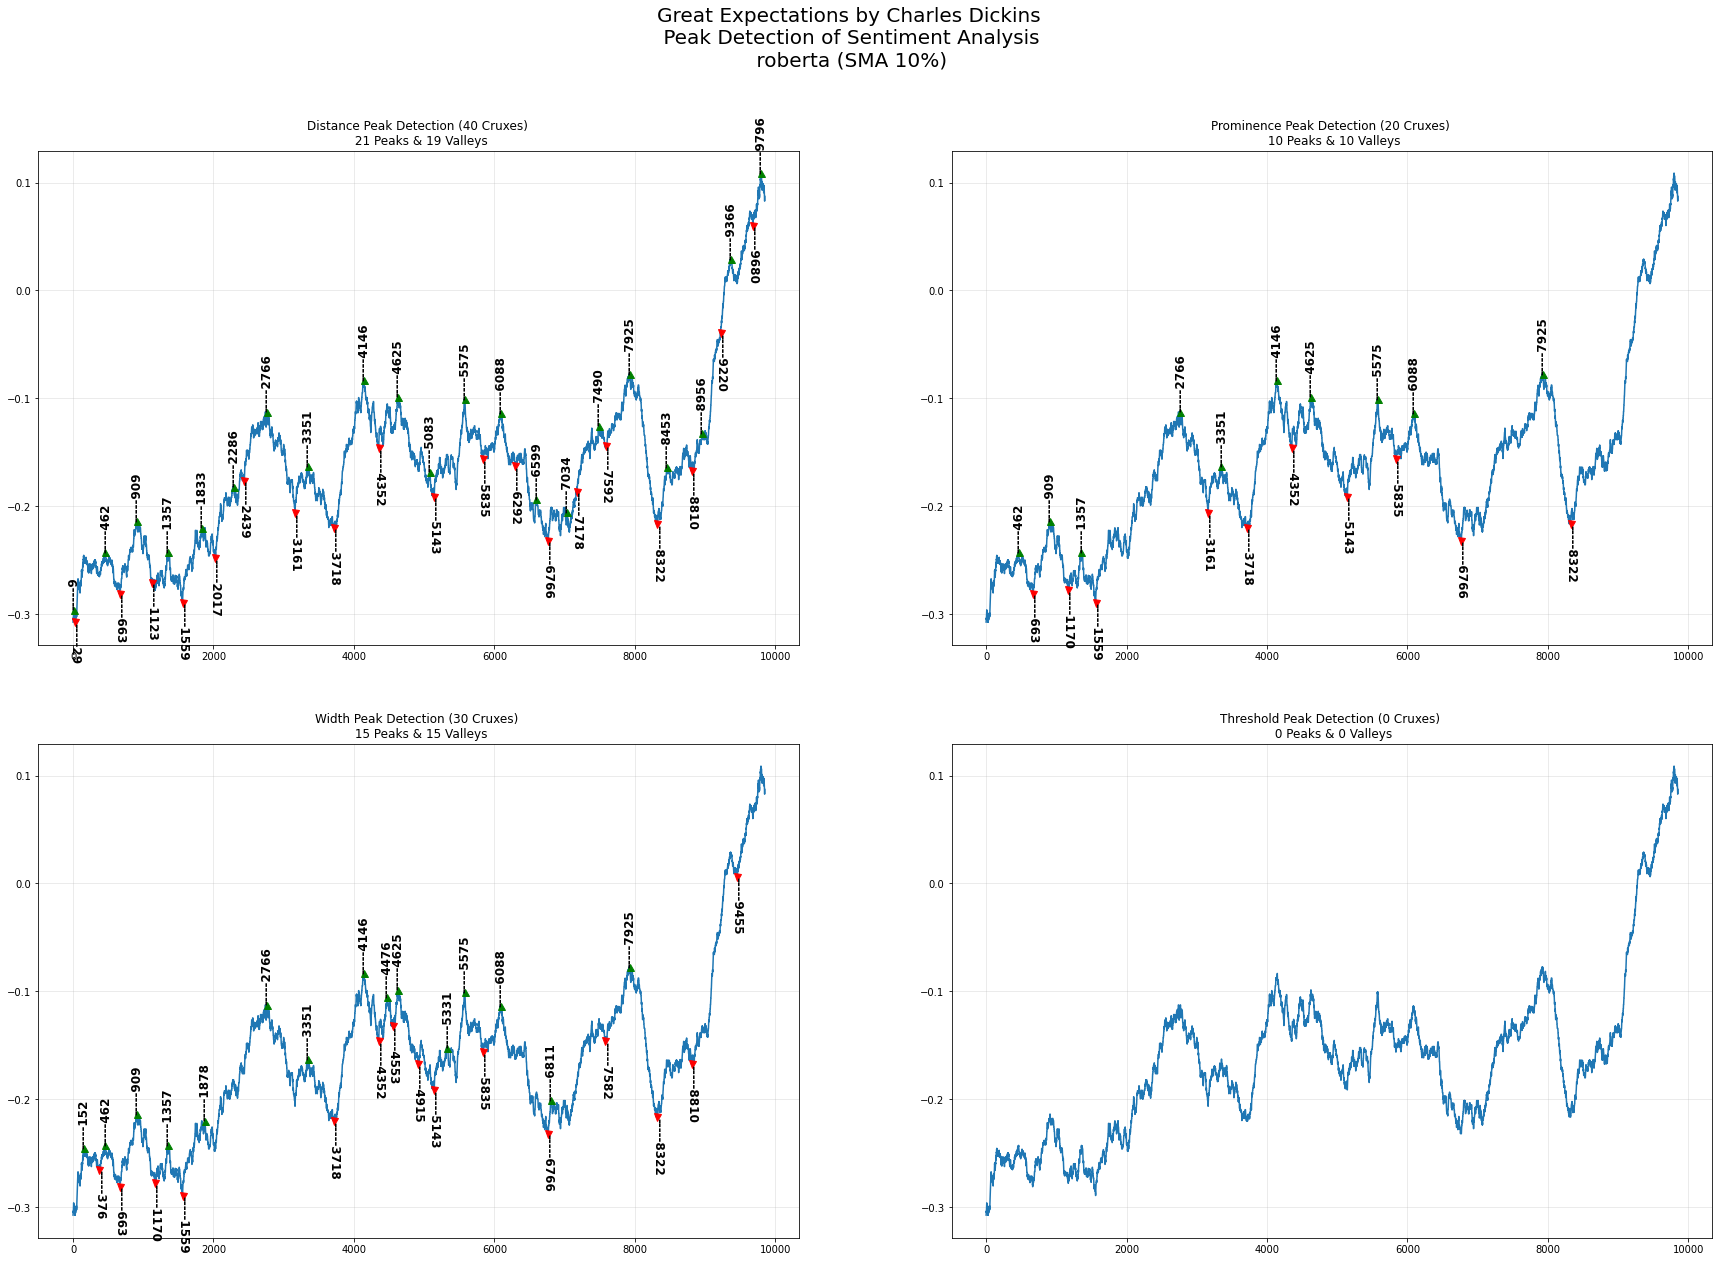

In [193]:
#@title Tune the main Hyperparameter for each of the 4 Peak Detection Algorithms:

Distance_Min = 410 #@param {type:"slider", min:100, max:1000, step:10}
Prominence_Min = 0.033 #@param {type:"slider", min:0.001, max:0.05, step:0.001}
Width_Min = 60 #@param {type:"slider", min:25, max:500, step:5}
Threshold_Min = 0.005 #@param {type:"slider", min:0.001, max:0.01, step:0.001}

plt.rcParams['figure.figsize'] = [30, 20]

model_name = f'{Sentiment_Model.lower()}_sma{window_percent}'

x = sentiment_df[model_name]

# Peak Algo #1 (by Distance)
distance_min = Distance_Min # 750

# Peak Algo #2 (by Prominence)
prominence_min = Prominence_Min # 0.01

# Peak Algo #3 (by Width)
width_min = Width_Min # 175

# Peak Algo #4 (by Threshold)
threshold_min = Threshold_Min # 0.001


peaks, _ = find_peaks(x, distance=distance_min)
peaks2, _ = find_peaks(x, prominence=prominence_min)      # BEST!
peaks3, _ = find_peaks(x, width=width_min)
peaks4, _ = find_peaks(x, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


x_inv = pd.Series([-x for x in sentiment_df[model_name].to_list()])

valleys, _ = find_peaks(x_inv, distance=distance_min)
valleys2, _ = find_peaks(x_inv, prominence=prominence_min)      # BEST!
valleys3, _ = find_peaks(x_inv, width=width_min)
valleys4, _ = find_peaks(x_inv, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


_ = plt.subplot(2, 2, 1)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Distance Peak Detection ({len(peaks)+len(valleys)} Cruxes) \n {len(peaks)} Peaks & {len(valleys)} Valleys')
_ = plt.plot(peaks, x[peaks], "^g", markersize=7)
_ = plt.plot(valleys, x[valleys], "vr", markersize=7)
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.subplot(2, 2, 2)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Prominence Peak Detection ({len(peaks2)+len(valleys2)} Cruxes) \n {len(peaks2)} Peaks & {len(valleys2)} Valleys')
_ = plt.plot(peaks2, x[peaks2], "^g", markersize=7)
_ = plt.plot(valleys2, x[valleys2], "vr", markersize=7)
for x_val in peaks2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 3)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Width Peak Detection ({len(peaks3)+len(valleys3)} Cruxes) \n {len(peaks3)} Peaks & {len(valleys3)} Valleys')
_ = plt.plot(valleys3, x[valleys3], "vr", markersize=7)
_ = plt.plot(peaks3, x[peaks3], "^g", markersize=7)
for x_val in peaks3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 4)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Threshold Peak Detection ({len(peaks4)+len(valleys4)} Cruxes) \n {len(peaks4)} Peaks & {len(valleys4)} Valleys')
_ = plt.plot(valleys4, x[valleys4], "vr", markersize=7)
_ = plt.plot(valleys4, x[valleys4], "^g", markersize=7)
for x_val in peaks4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.suptitle(f'{Novel_Title}\n Peak Detection of Sentiment Analysis\n {Sentiment_Model} (SMA {window_percent}%)', fontsize=20)
_ = plt.grid(True, alpha=0.3)

_ = plt.show()

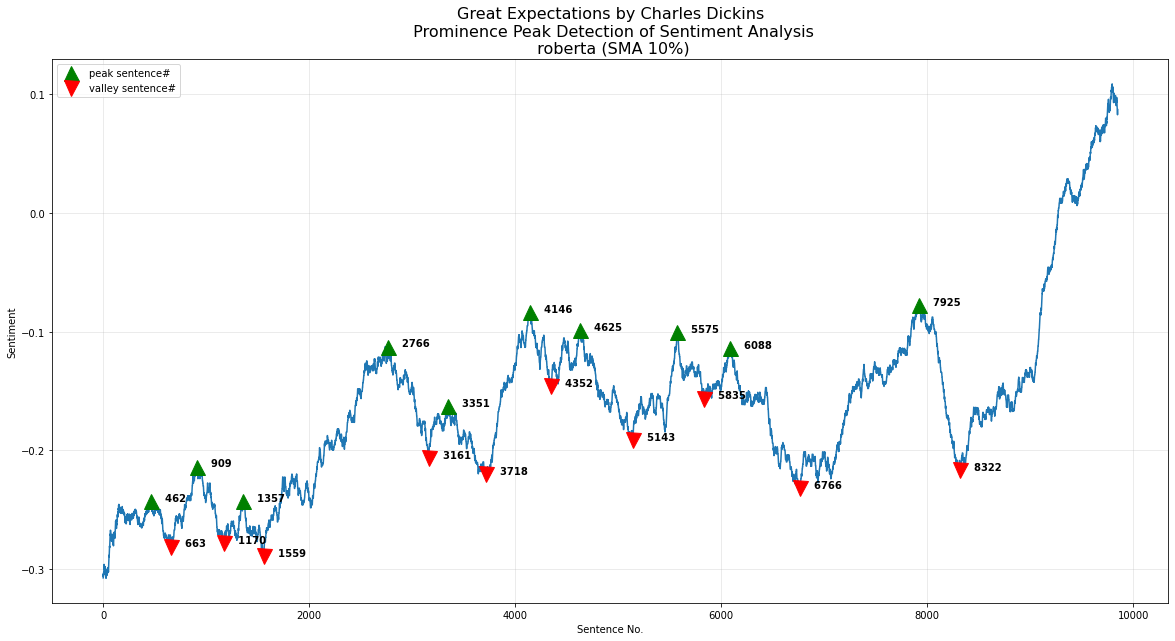



     >>>>> SAVED PLOT TO FILE: [cruxes_plot_Great_Expectations_by_Charles_Dickins.png] <<<<<


In [194]:
#@title Select a Peak Detection Algorithms to View in Detail (usually Distance or Width is best):

plt.rcParams['figure.figsize'] = [20, 10]

Peak_Algorithm = "Prominence" #@param ["Distance", "Prominence", "Width", "Threshold"]

if Peak_Algorithm == 'Distance':
  peaks = peaks
  valleys = valleys
elif Peak_Algorithm == 'Prominence':
  peaks = peaks2
  valleys = valleys2  
elif Peak_Algorithm == 'Width':
  peaks = peaks3
  valleys = valleys3
else:
  # Assume Peak_Algorithm == 'Threshold'
  peaks = peaks4
  valleys = valleys4

# model_name = f'{Sentiment_Model.lower()}_sma10'

# x = novel_clean_df[model_name]

# peaks2, _ = find_peaks(x, prominence=peak_prominence)  

# x_inv = pd.Series([-x for x in novel_clean_df[model_name].to_list()])
# valleys2, _ = find_peaks(x_inv, prominence=peak_prominence)     

_ = plt.plot(x)
_ = plt.plot(peaks, x[peaks], "^g", markersize=15, label='peak sentence#')
_ = plt.plot(valleys, x[valleys], "vr", markersize=15, label='valley sentence#')
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
_ = plt.title(f'{Novel_Title}\n {Peak_Algorithm} Peak Detection of Sentiment Analysis\n {Sentiment_Model} (SMA {window_percent}%)', fontsize=16)
_ = plt.ylabel('Sentiment')
_ = plt.xlabel('Sentence No.')
_ = plt.legend(loc='best')
_ = plt.grid(True, alpha=0.3)

filename_plot = f"cruxes_plot_{Novel_Title.replace(' ', '_')}.png"
_ = plt.savefig(filename_plot, dpi=300)
_ = plt.show();

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_plot}] <<<<<')

In [195]:
# Download Crux Point Plot file 'crux_plot.png' to your laptop

files.download(filename_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Get Context around Crux Points**

In [196]:
#@title How many Sentences around Crux Point do you want to view for context?

Crux_Sentence_Context_Count = 19 #@param {type:"slider", min:1, max:20, step:1}


In [197]:
# Print Context around each Sentiment Peak

output_ls = []

halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('============     Peak Crux Points   ==============')
output_ls.append('==================================================\n\n')

# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  print(f'Processing Peak #{i}...')
  crux_sents_ls = []
  for sent_idx in range(apeak-halfwin,apeak+halfwin+1):
    sent_cur = sentiment_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = sentiment_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('===========     Crux Valley Points    ============')
output_ls.append('==================================================\n\n')

# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  print(f'Processing Valley #{i}')
  crux_sents_ls = []
  for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
    sent_cur = sentiment_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

filename_cruxes = f"cruxes_context_{Novel_Title.replace(' ', '_')}.txt" 

output_str = ' '.join(output_ls)

with open(filename_cruxes, 'w') as f:
    f.write(output_str)

============     Peak Crux Points   ==============


Processing Peak #0...
Peak #0 at Sentence #462:

This IS kind!"
Every Christmas Day, he retorted, as he now retorted, "It's no more than your merits.
And now are you all bobbish, and how's Sixpennorth of halfpence?"
meaning me.
We dined on these occasions in the kitchen, and adjourned, for the nuts and oranges and apples, to the parlour; which was a change very like Joe's change from his working clothes to his Sunday dress.
My sister was uncommonly lively on the present occasion, and indeed was generally more gracious in the society of Mrs. Hubble than in other company.
I remember Mrs. Hubble as a little curly sharp-edged person in sky-blue, who held a conventionally juvenile position, because she had married Mr. Hubble—I don't know at what remote period—when she was much younger than he.
I remember Mr Hubble as a tough high-shouldered stooping old man, of a sawdusty fragrance, with his legs extraordinarily wide apart: so that in my 

36534

In [198]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

files.download(filename_cruxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
!cat $filename_cruxes

================================================== ============     Peak Crux Points   ============== ==================================================

 Peak #0 at Sentence #462:

This IS kind!"
Every Christmas Day, he retorted, as he now retorted, "It's no more than your merits.
And now are you all bobbish, and how's Sixpennorth of halfpence?"
meaning me.
We dined on these occasions in the kitchen, and adjourned, for the nuts and oranges and apples, to the parlour; which was a change very like Joe's change from his working clothes to his Sunday dress.
My sister was uncommonly lively on the present occasion, and indeed was generally more gracious in the society of Mrs. Hubble than in other company.
I remember Mrs. Hubble as a little curly sharp-edged person in sky-blue, who held a conventionally juvenile position, because she had married Mr. Hubble—I don't know at what remote period—when she was much younger than he.
I remember Mr Hubble as a tough high-shouldered stooping old man, o

# **END OF NOTEBOOK**